____________________________________________________________________________
**Импорт библиотек и модулей**
____________________________________________________________________________

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

____________________________________________________________________________
**Общая проверка данных**
____________________________________________________________________________

In [4]:
df = pd.read_csv('/content/employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [5]:
df.shape

(55769, 22)

____________________________________________________________________________
**Статистика**
____________________________________________________________________________

In [6]:
df.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55768.000000,55768.000000,55768.000000,55768.000000,55768.000000,55768.000000
mean,2.562858,2013.284477,487.123725,28401.169037,67901.514479,5454.804529,4624.127069,77980.861742,13973.393510,9536.294336,4585.310066,28094.997912,106075.859653
std,1.522308,0.451169,340.972868,16391.546592,44086.018421,12525.655238,9121.397671,53126.416933,9636.331443,4836.462162,3526.624271,16187.327229,67915.698009
min,1.000000,2013.000000,1.000000,1.000000,-2596.000000,-1072.880000,-7058.590000,-2596.000000,-30621.430000,-502.110000,-9717.340000,-20931.960000,-3591.030000
25%,1.000000,2013.000000,197.000000,14301.000000,32097.540000,0.000000,0.000000,35363.655000,5822.792500,5510.697500,1747.407500,13781.970000,49518.720000
50%,2.000000,2013.000000,535.000000,28216.000000,66258.120000,0.000000,1103.960000,74382.475000,14277.260000,12796.000000,4258.635000,31774.380000,106887.530000
75%,4.000000,2014.000000,790.000000,42617.000000,96702.540000,4365.630000,6231.560000,112082.782500,20627.500000,12918.250000,6840.400000,39769.870000,152405.355000
max,7.000000,2014.000000,990.000000,56986.000000,319275.010000,190244.380000,342802.630000,471952.640000,68165.140000,21291.180000,32296.030000,101397.140000,510574.450000


In [7]:
df.nunique()

Organization Group Code        7
Job Family Code               55
Job Code                    1070
Year Type                      1
Year                           2
Organization Group             7
Department Code               54
Department                    54
Union Code                    69
Union                         69
Job Family                    54
Job                         1076
Employee Identifier        38784
Salaries                   40461
Overtime                   24978
Other Salaries             33412
Total Salary               52202
Retirement                 40587
Health and Dental          17395
Other Benefits             52343
Total Benefits             54202
Total Compensation         54830
dtype: int64

In [8]:
Missing_value = df.isna().sum()
Missing_value

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               1
Retirement                 1
Health and Dental          1
Other Benefits             1
Total Benefits             1
Total Compensation         1
dtype: int64

In [9]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                   int64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

____________________________________________________________________________
**Предварительная обработка данных**
____________________________________________________________________________

Как видно, столбцы Union и Union code содержат больше отсутствующих значений, чем фактически уникальных значений.

In [10]:
df = df.drop('Union Code', axis = 1)
df = df.drop('Union', axis = 1)

Мы должны разобраться с неизвестными значениями в столбцах Department, Department code и Job. Имейте в виду, что для проекта кластеризации нам нужны только числовые признаки, но если мы хотим использовать другую модель, хорошим способом будет исправить отсутствующие значения, а не просто удалять их.

In [11]:
df['Department Code'] = df['Department Code'].fillna(df['Department Code'].mode()[0])
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
#df['Job'] = df['Job'].fillna(df['Job'].mod()[0])

Колонка Job code содержит числовые значения, но имеет тип object. Необходимо правильно его преобразовать.

In [12]:
df['Job Code'] = pd.to_numeric(df['Job Code'], errors='coerce').fillna(0).astype(np.int64)

Теперь мы создаем два одинаковых DataFrame, один для кластеризации, а другой мы можем использовать для моделей, таких как Random Forest, KNeighbors, LinearRegression, а также применять GradientBoostingRegressor.

In [13]:
df_for_linear = df.copy()

Необходимо применить функцию dropna(), которая используется для удаления всех отсутствующих значений из исходного DataFrame.

In [14]:
df = df.dropna()

In [15]:
missing_value = df.isna().sum()
missing_value

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

____________________________________________________________________________
**Анализ данных**
____________________________________________________________________________

Выбросы могут существенно повлиять на производительность и надежность статистических моделей, а также на действительность выводов, сделанных из анализа данных. 

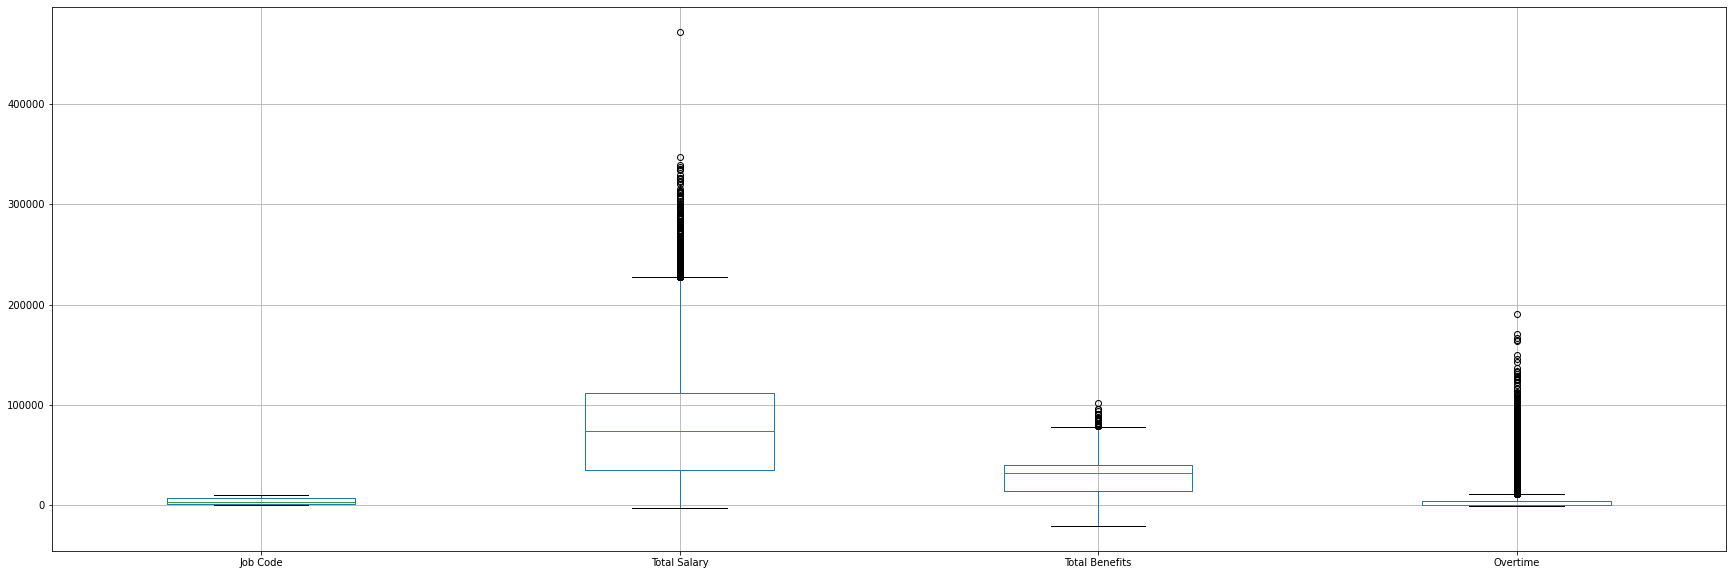

In [16]:
df.boxplot(column= ['Job Code', 'Total Salary', 'Total Benefits', 'Overtime'],figsize=(30,10))

Как видно на двух графиках ниже, общие городские обязанности имеют самый низкий уровень зарплат. Мы видим, что защита общественного порядка имеет самые высокие средние зарплаты.

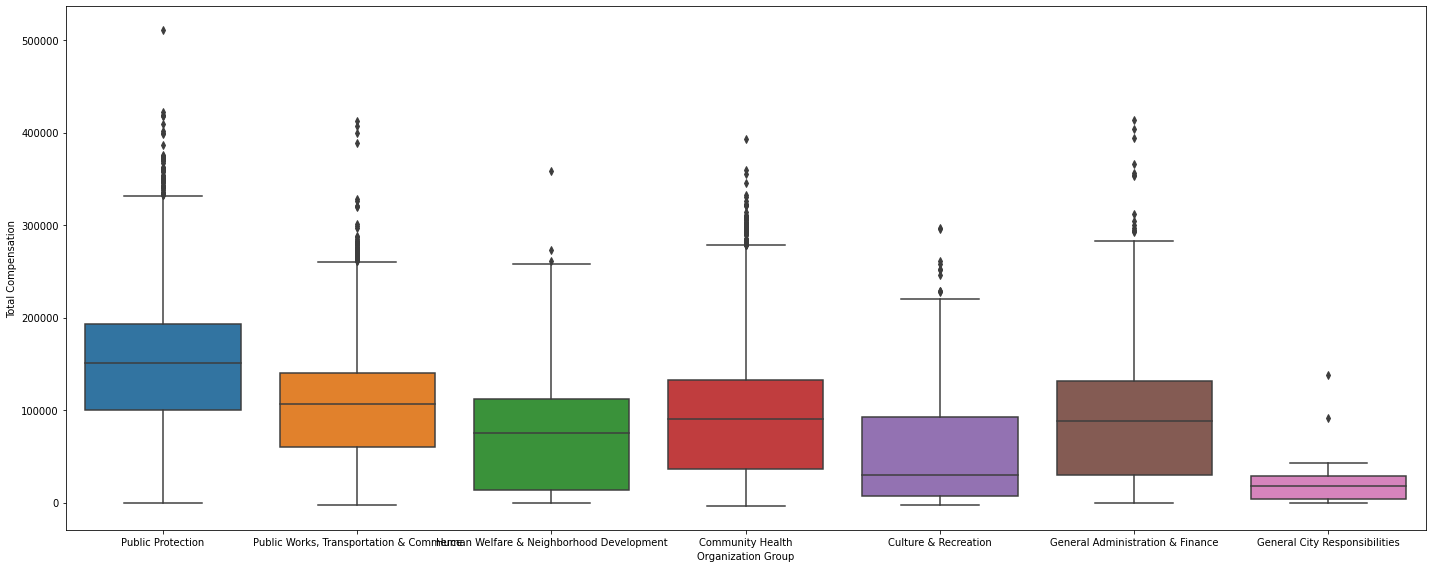

In [17]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x="Organization Group", y="Total Compensation", data=df)
plt.tight_layout()

Обязанности по общим городским вопросам имеют самую высокую плотность, что означает большое количество рабочих мест, но уровень зарплаты довольно низкий. Мы также можем выбрать группу "Культура и отдых", которая визуально имеет среднее количество рабочих мест и зарплату. Два разных графика показывают нам информацию о том, как администрация Сан-Франциско тратит средства на зарплаты и количество рабочих мест.

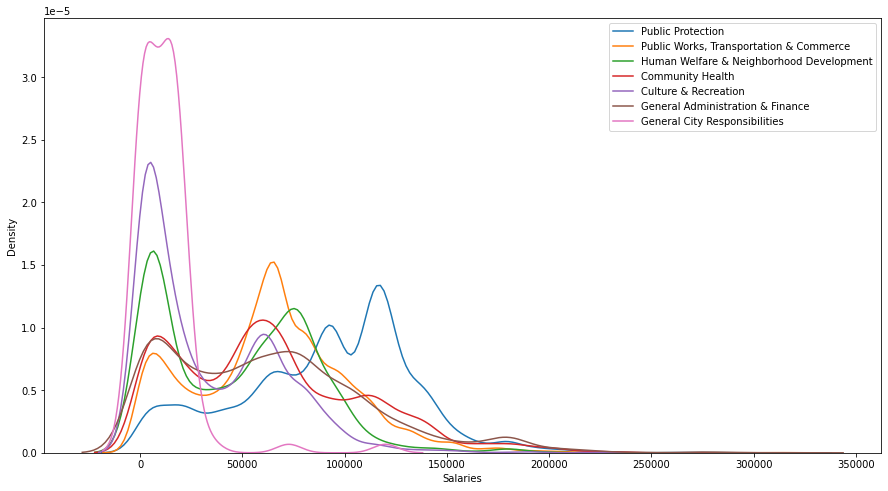

In [18]:
plt.figure(figsize=(15,8))
for col in list(df['Organization Group'].unique()):
    sns.kdeplot(df['Salaries'][df['Organization Group'] == col])
    plt.legend(df['Organization Group'].unique())

График ниже показывает, что общая компенсация включает в себя все, что включено в зарплату и общую зарплату, что логически обосновано. Однако можно заметить разрыв между общей компенсацией и общей зарплатой и сделать вывод, что чем выше общая зарплата, тем меньше разрыв между общими льготами и общей зарплатой, что означает, что работники с высокими зарплатами не чувствуют так сильно влияния льгот.

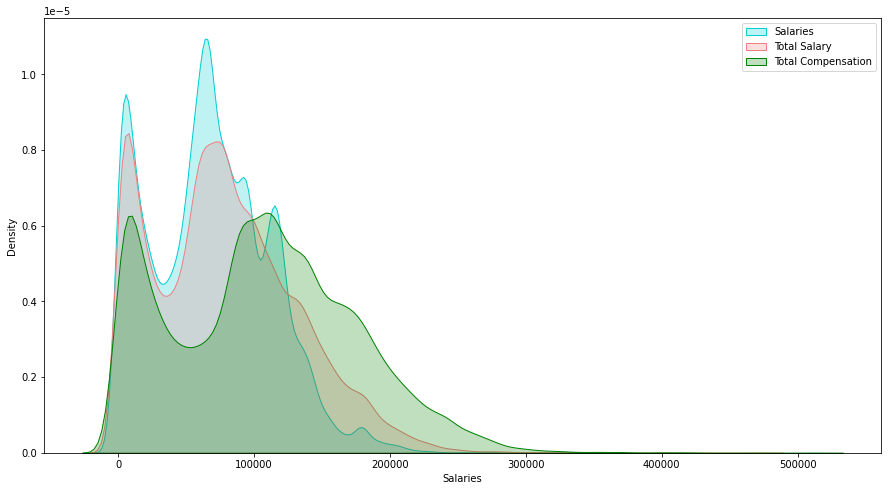

In [19]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['Salaries'], color="darkturquoise", shade=True)
sns.kdeplot(df['Total Salary'], color="lightcoral", shade=True)
sns.kdeplot(df['Total Compensation'], color="green", shade=True)
plt.legend(['Salaries','Total Salary','Total Compensation'])
plt.show()


График ниже показывает нам, что больше сотрудников получают медицинские и стоматологические льготы, но визуально можно сказать, что это составляет четверть от общего числа льгот. Пенсионное обеспечение действительно включает в себя значительную долю плотности, и в то же время половина сотрудников получает треть или менее всех пенсионных льгот. Можно сделать вывод, что малая часть сотрудников имеет больше льгот, чем другие.

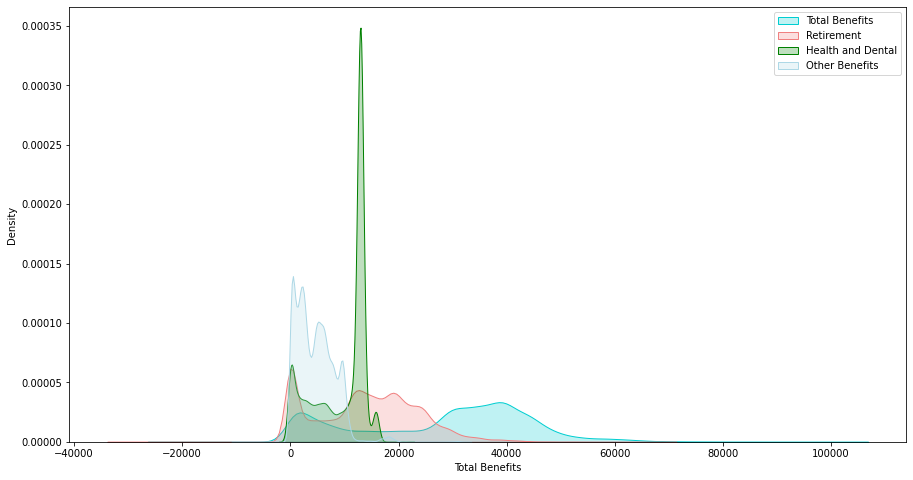

In [20]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['Total Benefits'], color="darkturquoise", shade=True)
sns.kdeplot(df['Retirement'], color="lightcoral", shade=True)
sns.kdeplot(df['Health and Dental'], color="green", shade=True)
sns.kdeplot(df['Other Benefits'], color="lightblue", shade=True)
plt.legend(['Total Benefits','Retirement','Health and Dental','Other Benefits'])
plt.show()

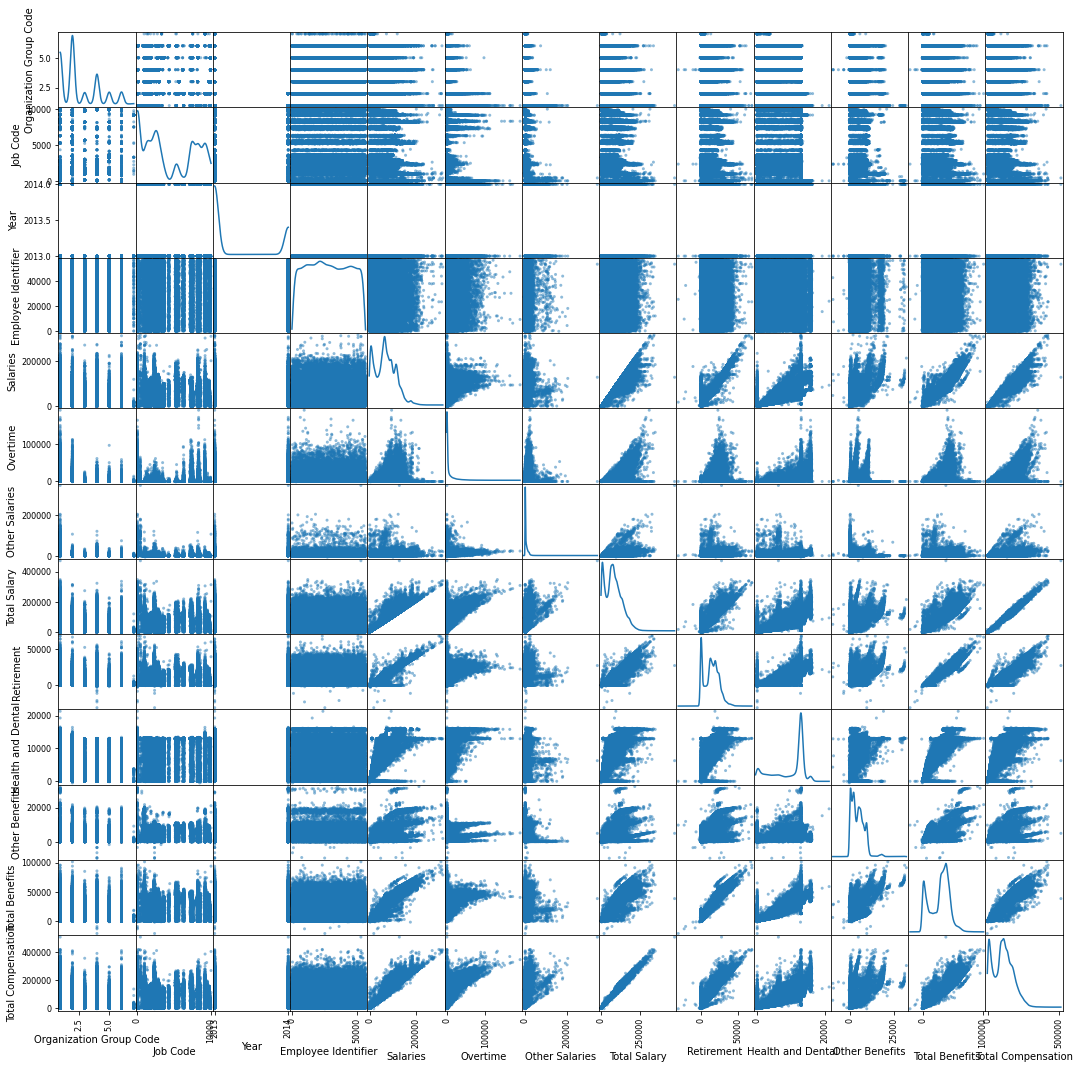

In [21]:
scatter_matrix(df, alpha=0.5, figsize=(18, 18), diagonal='kde')
plt.show()

Мы можем видеть корреляции в области материальных благ, таких как зарплаты и все льготы, они значительны, и это ожидаемо.

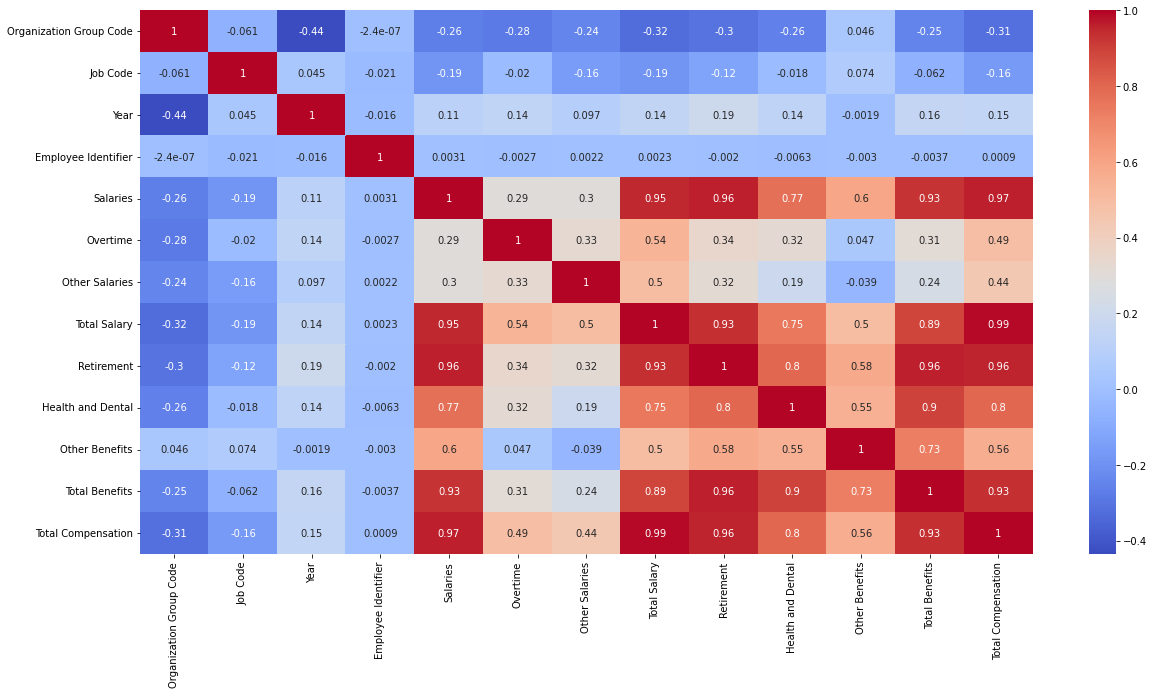

In [22]:
plt.figure(figsize=(20,10))
corre = df.corr()
sns.heatmap(corre,annot=True,cmap='coolwarm')
plt.show()

____________________________________________________________________________
**Выбор признаков**
____________________________________________________________________________

In [23]:
#df.drop({'Organization Group Code','Year','Union Code','Employee Identifier','Overtime','Other Salaries'},axis=1,inplace=True)

In [24]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                     int64
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [25]:
df1 = df.select_dtypes(include=('int64','float64'))
df1.columns

Index(['Organization Group Code', 'Job Code', 'Year', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [26]:
df1.head()

,Organization Group Code,Job Code,Year,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1021,2013,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1023,2013,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1031,2013,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1054,2013,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1062,2013,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [27]:
df1.drop(['Salaries', 'Total Salary','Other Benefits', 'Total Benefits'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
df1['health and retirement']=df1['Retirement']+df1['Health and Dental']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df1.drop(['Retirement','Health and Dental'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
df1.drop(['Organization Group Code','Job Code','Year','Employee Identifier','Overtime','Other Salaries'],axis=1,inplace=True)
df1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Total Compensation,health and retirement
0,85281.78,23214.50
1,79895.32,17461.68
2,93649.71,25414.07
3,134237.37,32562.69
4,7512.31,2040.81


In [31]:
df1.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [32]:
df.dropna(inplace=True)

____________________________________________________________________________
**Выбор модели и обучение**
____________________________________________________________________________

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=3)

In [35]:
kmeans.fit(df.drop(['Organization Group Code','Job Family Code','Job Code','Year Type','Year','Organization Group','Department Code','Department', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Other Benefits', 'Total Benefits', 'Total Compensation'], axis=1))

KMeans(n_clusters=3)

In [36]:
print(kmeans.cluster_centers_)

[[ 81765.91958751  15714.59720118  11939.79940371]
 [ 19303.39508673   2918.008734     3549.66378149]
 [154942.54960574  26263.83570191  13052.06301386]]


In [37]:
y = kmeans.labels_
print(y)

[0 0 0 ... 0 0 0]


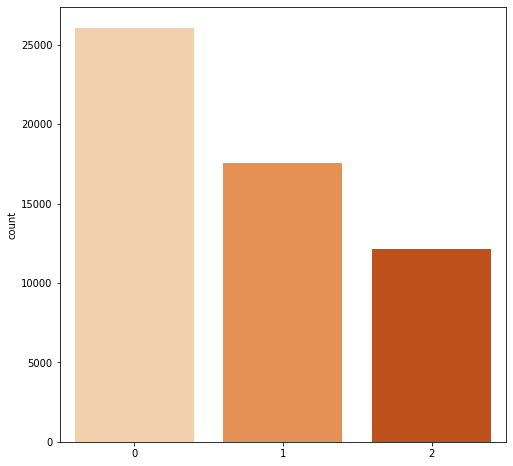

In [38]:
plt.figure(figsize = (8, 8))
sns.countplot(x = kmeans.labels_, palette = 'Oranges')
plt.show();

In [39]:
df['labels'] = kmeans.labels_

Text(0, 0.5, 'Total Benefits')

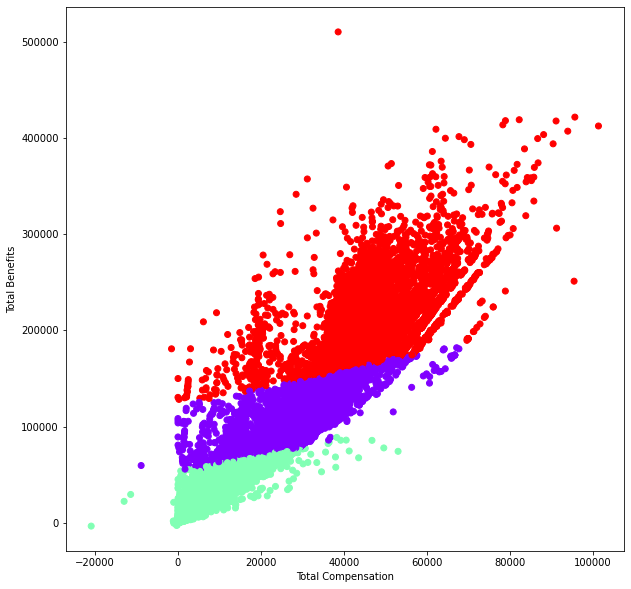

In [40]:
plt.figure(figsize = (10, 10))
plt.scatter(x = df['Total Benefits'], y = df['Total Compensation'],c=df['labels'], cmap='rainbow')
plt.xlabel('Total Compensation')
plt.ylabel('Total Benefits')

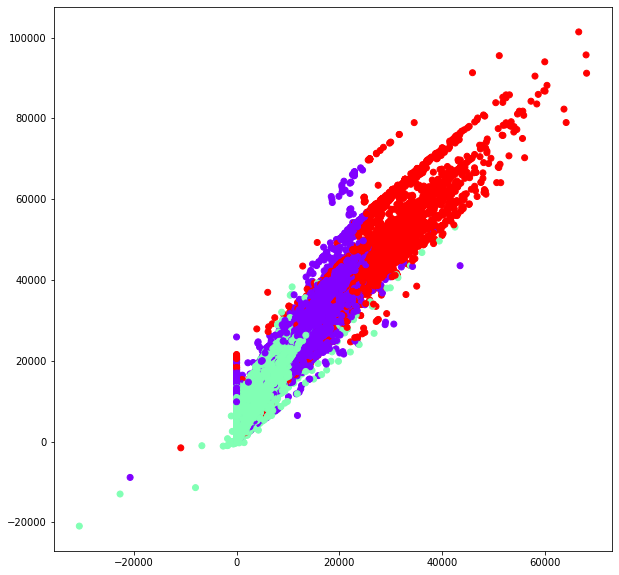

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(df.iloc[:,15].values,df.iloc[:,18].values, c=kmeans.labels_, cmap="rainbow")
plt.show()

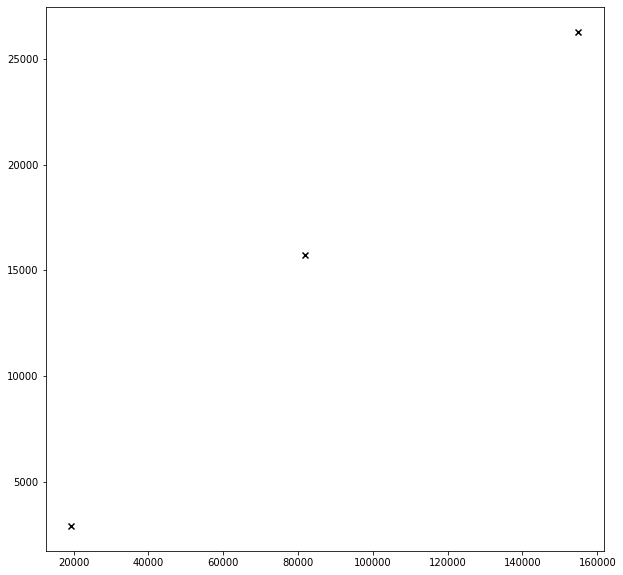

In [42]:
plt.figure(figsize=(10,10))
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

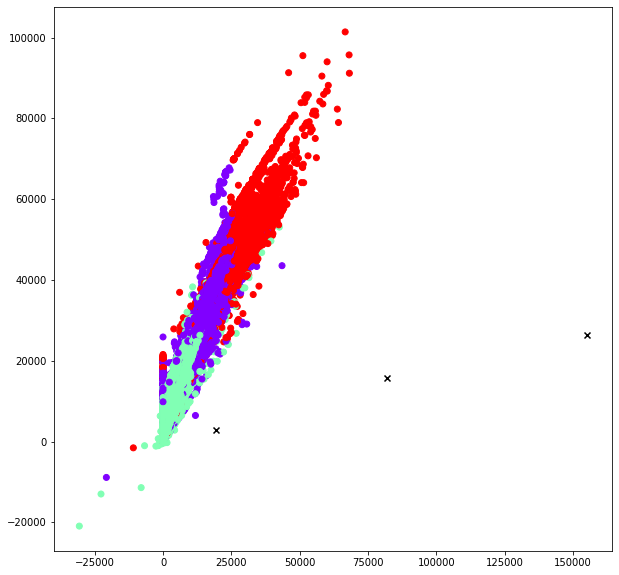

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(df.iloc[:,15].values,df.iloc[:,18].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker = "x", color = 'k')
plt.show()

In [44]:
#y = kmeans.predict(df1)

In [45]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [46]:
K = range(1,10)
X = df.drop(['Organization Group Code','Job Family Code','Job Code','Year Type','Year','Organization Group','Department Code','Department', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Other Benefits', 'Total Benefits',\
       'Total Compensation'], axis=1)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

In [47]:
## Total with-in sum of square
wcss = [sum(d**2) for d in dist]

In [48]:
X.shape[1]

4

In [49]:
kIdx = 10-1

Text(0.5, 1.0, 'Elbow for KMeans cluestering')

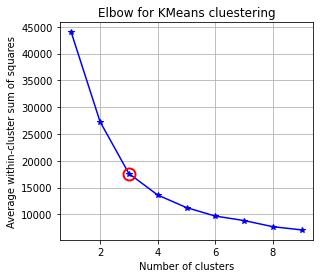

In [50]:
## PLOT
kIdx=2
## Elbow curve
## set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker = 'o', markersize = 12, markeredgewidth=2, markeredgecolor='r',markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans cluestering')

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [52]:
silhouette_score(X,y)

0.5736424080869951

In [53]:
from sklearn.metrics import silhouette_score
from matplotlib import cm

In [56]:
score = []
for n_clusters in range(2,10):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(X)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  score.append(silhouette_score(X, labels, metric = 'euclidean'))

Text(0.5, 1.0, 'Silouette for K-means')

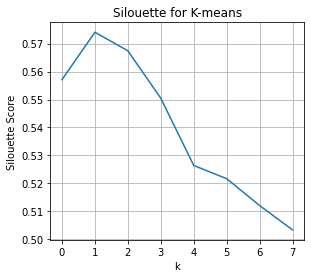

In [57]:
# Set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(score)
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")